# Feature Selection Experiment

In [7]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')


In [8]:
df_pollutants = pd.read_csv('../data/cached_air_pollution_data.csv')
df_climate = pd.read_csv('../data/cached_openweather_data.csv')

In [9]:
df_combined = df_climate.join(df_pollutants.set_index(['latitude', 'longitude']), on=['latitude', 'longitude'], how='left')

In [10]:
df_combined

,latitude,longitude,feels_like,temp,temp_min,temp_max,humidity,clouds_all,wind_deg,pressure,wind_speed,timestamp,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,50.866580,-2.173528,270.21,274.13,272.51,275.08,89.0,12.0,13.0,1010.0,3.80,1701450000,270.37,0.00,15.25,31.83,1.48,4.33,4.98,0.72
1,50.875335,-2.173528,270.21,274.13,272.51,275.08,89.0,12.0,13.0,1010.0,3.80,1701450000,270.37,0.00,15.25,31.83,1.48,4.33,4.98,0.72
2,50.884090,-2.173528,270.21,274.13,272.51,275.08,89.0,12.0,13.0,1010.0,3.80,1701450000,270.37,0.00,15.25,31.83,1.48,4.33,4.98,0.72
3,50.892845,-2.173528,270.21,274.13,272.51,275.08,89.0,12.0,13.0,1010.0,3.80,1701450000,270.37,0.00,15.25,31.83,1.48,4.33,4.98,0.72
4,50.901600,-2.173528,270.21,274.13,272.51,275.08,89.0,12.0,13.0,1010.0,3.80,1701450000,280.38,0.01,20.22,25.75,1.94,5.02,5.79,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,52.573809,0.312971,270.77,273.28,272.96,274.27,77.0,20.0,20.0,1010.0,2.06,1701450000,270.37,0.01,10.37,34.69,0.56,0.95,1.61,2.56
39996,52.582564,0.312971,270.77,273.28,272.96,274.27,77.0,20.0,20.0,1010.0,2.06,1701450000,270.37,0.01,10.37,34.69,0.56,0.95,1.61,2.56
39997,52.591319,0.312971,270.77,273.28,272.96,274.27,77.0,20.0,20.0,1010.0,2.06,1701450000,270.37,0.01,10.37,34.69,0.56,0.95,1.61,2.56
39998,52.600074,0.312971,270.77,273.28,272.96,274.27,77.0,20.0,20.0,1010.0,2.06,1701450000,270.37,0.01,10.37,34.69,0.56,0.95,1.61,2.56


In [11]:
df_corr = df_combined.corr().loc[df_climate.columns,df_pollutants.columns.difference(['timestamp', 'latitude', 'longitude'])]

In [12]:
# df_corr = df_corr.drop(columns=["timestamp"])

In [13]:
import matplotlib.pylab as pylab
fac = 12
params = {'legend.fontsize': f'{fac}',
          'figure.figsize': (15, 7),
         'axes.labelsize': f'{fac}',
         'axes.titlesize':f'{fac}',
         'xtick.labelsize':f'{fac}',
         'ytick.labelsize':f'{fac}',
          # 'title.size': '15'
          # 'figure.titlesize': '15' 
         }
pylab.rcParams.update(params)

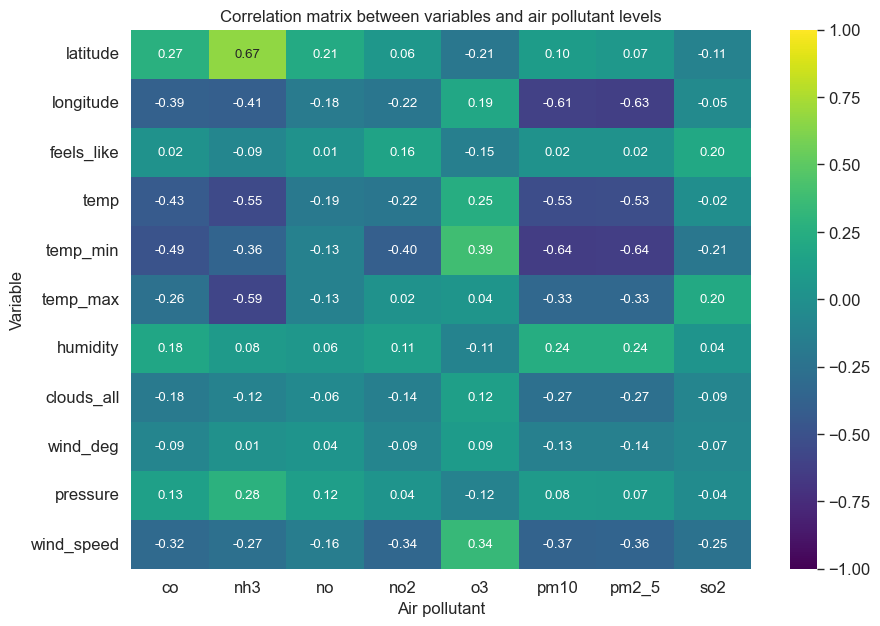

In [14]:

fig, ax = plt.subplots(1,1, figsize=(10,7))

df_corr_imputed = df_corr.fillna(df_corr.median())

# Create the heatmap with the imputed DataFrame
heatmap = sns.heatmap(df_corr_imputed, annot=True, vmin=-1,fmt=".2f",  vmax=1, cmap='viridis', ax=ax)
heatmap.set_title('Correlation matrix between variables and air pollutant levels')
ax.set_xlabel("Air pollutant")
ax.set_ylabel("Variable")
# Save the heatmap
plt.savefig('../figs/heatmap.pdf', bbox_inches='tight')
plt.savefig('../figs/heatmap.png', bbox_inches='tight')


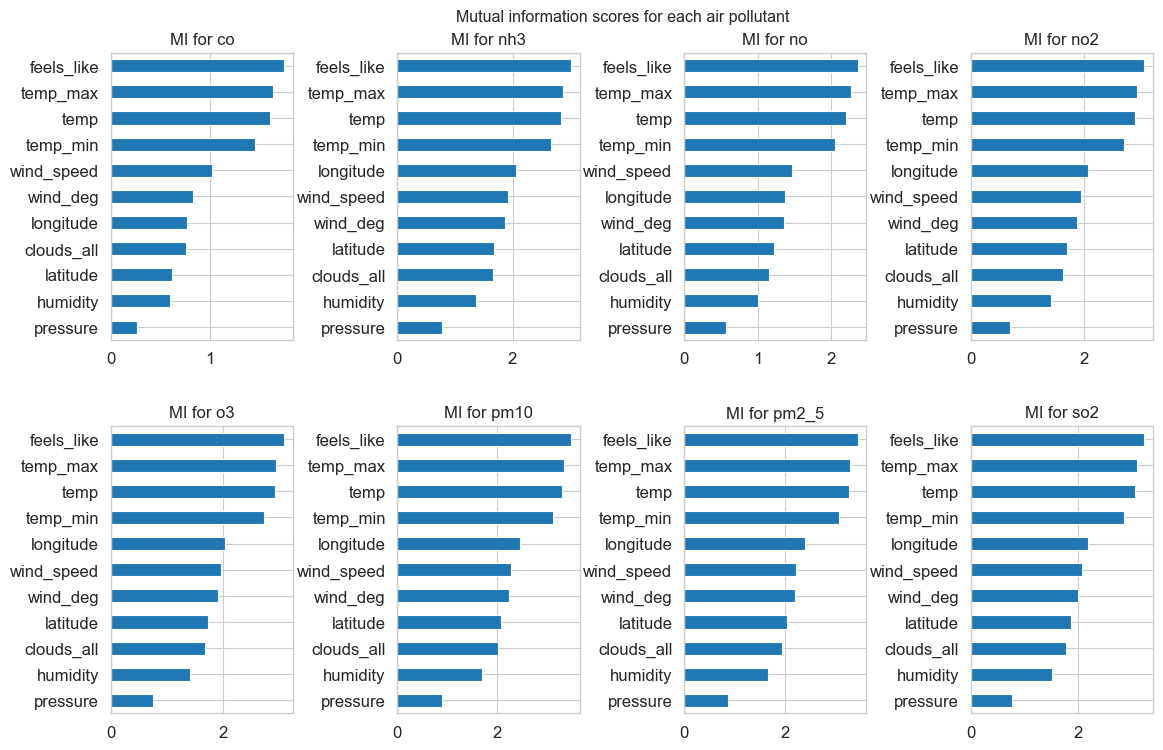

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
fig.tight_layout(pad=4.0)

axs = axs.flatten()

for i, target in enumerate(df_pollutants.columns.difference(['timestamp','latitude', 'longitude'])):
	mi = mutual_info_regression(df_combined[df_climate.columns], df_combined[target])
	mutual_info = pd.Series(mi)
	mutual_info.index = df_climate.columns
	
	mutual_info.sort_values().plot.barh(title=f"MI for {target}", ax=axs[i])
fig.suptitle('Mutual information scores for each air pollutant')
fig.savefig('../figs/mutual_info.pdf')
fig.savefig('../figs/mutual_info.png')

In [16]:
climate_variables = [
    "feels_like",
    "temp_max",
    "temp",
    "temp_min",
    "wind_speed",
    "wind_deg",
    "clouds_all",
    "humidity",
    "pressure",

]

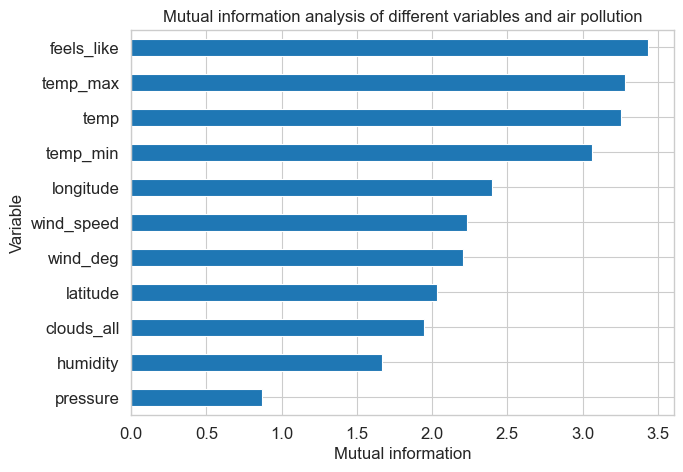

In [17]:
mi = mutual_info_regression(df_combined[df_climate.columns], df_pollutants['pm2_5'])
mutual_info = pd.Series(mi)
mutual_info.index = df_climate.columns
fig, ax = plt.subplots(1,1, figsize=(7,5))
mutual_info.sort_values().plot.barh()

ax.set_xlabel("Mutual information")
ax.set_ylabel("Variable")
ax.set_title("Mutual information analysis of different variables and air pollution")
plt.savefig("../figs/pm2_5_mi.pdf", bbox_inches='tight')
plt.savefig("../figs/pm2_5_mi.png", bbox_inches='tight')